# Proyecto Integrado Final - Modulo 1

## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas como Xbox o PlayStation y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Vamos a identificar patrones que determinen si un juego tiene éxito o no, y detectar proyectos prometedores y planificar campañas publicitarias.

## Paso 1. Abrir el archivo de datos y estudiar la informacion general. 

#### Cargar todas las librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

#### Leer el archivo `games.csv` de la carpeta `/datasets/` y almacenar el DataFrame.

In [2]:
games = pd.read_csv('/datasets/games.csv')

#### Estudiar la informacion general del DataFrame.

Vamos a llamar el metodo .info(), .head() y .describe(), para poder visualizar un poco que contiene este DataFrame (de que esta compuesto) y llevarnos una idea inicial sobre que tenemos que comenzar a limpiar y organizar.

In [3]:
games.info()
print(games.head(10))
print(games.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart 

#### Observaciones: 

Esta tabla contiene once columnas que almacena diferentes tipos de datos:

#### Descripción de datos
0. Name (Nombre)
1. Platform (Plataforma)
2. Year_of_Release (Año de lanzamiento)
3. Genre (Género)
4. NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
5. EU_sales (ventas en Europa en millones de dólares estadounidenses)
6. JP_sales (ventas en Japón en millones de dólares estadounidenses)
7. Other_sales (ventas en otros países en millones de dólares estadounidenses)
8. Critic_Score (máximo de 100)
9. User_Score (máximo de 10)
10. Rating (ESRB) - Almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Es posible que los datos de 2016 estén incompletos.

Podemos ver en principio varios problemas:
1. El estilo en los encabezados de la tabla, algunos están en mayúsculas, otros en minúsculas.
2. Varios no tienen la tipificacion correcta (year_of_release, critic_score, user_score).
3. Existen muchos valores ausentes en las diferentes columnas (name=2, year_of_release=269, genre=2, critic_score=8578, user_score=6701, rating=6766 ).


## Paso 2. Preprocesar los datos.

Aquí vamos a preparar los datos para analizarlos.
El primer paso es resolver los problemas con los encabezados. Después convertir los tipos de datos y tambien solucionar los valores ausentes y duplicados.
Y por ultimo calcular el total de las ventas.

#### Estilo del encabezado.
Vamos a corregir el formato en los encabezados de la tabla.

In [4]:
print(games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Vamos a utiliza un Bucle for para iterar sobre los nombres de las columnas y poner todos los caracteres en minúsculas, y volvemos a mostrar los encabezados de la tabla.

In [5]:
new_col_names = []

for old in games.columns:
    name_lower = old.lower()
    new_col_names.append(name_lower)

games.columns = new_col_names
print(games.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Valores ausentes.
Vamos a ajustar los valores ausentes (Nan) que se hayan presentado en las diferentes columnas.

name=2
year_of_release=269
genre=2
critic_score=8578
user_score=6701
rating=6766

In [6]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Para el caso de la columna 'name' solo nos genera 2 registros que no tiene informacion, adicional se observa que en otras columnas tambien tiene valores ausentes que son importantes, pero al ser informacion tan antigua y tan minima que no va a afectar nuestro analisis, lo vamos a eliminar.

In [7]:
games_clean = games.dropna(subset=['name'])
games_clean['name'].isna().sum() 

0

Para el caso de la columna 'user_score' vamos a reemplazar los valores 'tbd' por valor ausente (NaN), dado su volumen y naturaleza, se mantuvieron como NaN para evitar introducir sesgos o pérdida de información, ya que al final es informacion que no se tiene y podria afectar el analisis mas adelante. Se deciden dejar los valores especificamente como nulos, no eliminarlos porque es demasiada informacion, y no rellenar como 0 porque distorsiona el analisis.

In [8]:
print(games_clean['user_score'].sort_values(ascending=True).unique())
games_clean['user_score'].dtype

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


dtype('O')

In [9]:

games_clean = games_clean.copy()
games_clean['user_score'] = games_clean['user_score'].replace('tbd', pd.NA)
games_clean['user_score'].isna().sum()


9123

Para el caso de la columna 'year_of_release' nos genera 269 registros que no tiene informacion, y que solo corresponde al 1,6% de toda la informacion, por lo cual no seria tan relevante y vamos a eliminar.

In [10]:
games_clean[games_clean['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,<NA>,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
games_clean = games_clean.dropna(subset=['year_of_release'])
games_clean['year_of_release'].isna().sum() 

0

Para el caso de la columna 'critic_score' nos genera 8578 registros que no tiene informacion, es una cantidad de informacion importante que no podemos eliminar ni podemos inventar informacion, por lo cual no la transformaremos. Tal vez estos datos no se diligenciaron por que fueron juegos que no tuvieron tanta trascendencia, o los lanzamientos fueron pequeños o no habo suficientes reseñas.

Para el caso de la columna 'rating' nos genera 6766 registros que no tiene informacion, por lo cual lo vamos a mapear a una categoría explícita 'unknown'.

In [12]:
games_clean['rating'] = games_clean['rating'].fillna('unknown')
games_clean['rating'].isna().sum()

0

#### Tipos de datos.
Vamos a corregir y convertir los datos en los tipos necesarios.

In [13]:
games_clean.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [14]:
# Para el año vamos a cambiar de decimal a entero
games_clean['year_of_release'] = games_clean['year_of_release'].astype('Int64')

# Para user score vamos a cambiar de object a decimal
games_clean['user_score'] = pd.to_numeric(games_clean['user_score'])

# Para genre y rating vamos a cambiar de object a category
cols = ['genre', 'rating']
games_clean[cols] = games_clean[cols].astype('category')

# Y confirmamos que todos los ajustes hayan quedado correctamente.
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16444 non-null  category
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.3+ MB



#### Enriquecer los datos.
Ahora que tenemos todos los registros de games limpios, el siguiente paso es comenzar a generar insights que puedan ayudar a la empresa a tomar decisiones estratégicas.
Vamos a crear una nueva columna que calcule las ventas totales, de todas las 4 zonas.


In [15]:
games_clean['ventas_totales'] = games_clean['na_sales'] + games_clean['eu_sales'] + games_clean['jp_sales'] + games_clean['other_sales']

In [16]:
print(games_clean)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

#### Duplicados.
Vamos a verificar si existen duplicados explicitos e implicitos que debamos eliminar.

In [17]:
print(games_clean.duplicated().sum())

0


In [18]:
list(games_clean['genre'].unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

Para los 2 anteriores casos no exisitieron valores duplicados para anular o eiliminar.

## Paso 3. Analizar los datos.

### Verificamos cuántos juegos fueron lanzados en diferentes años.

<AxesSubplot:xlabel='year_of_release'>

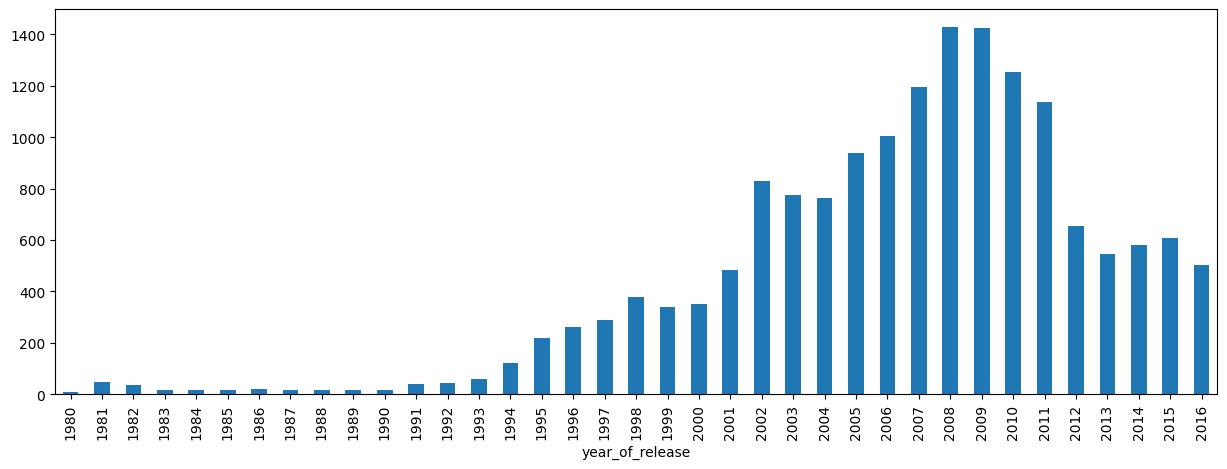

In [19]:
games_clean.groupby(['year_of_release'])['name'].count().plot(figsize=(15,5), kind='bar')

Los datos no son nada significativos desde 1980 hasta 1993, y mas o menos desde el año 2001 es que ya comienzan a ser relevantes, comienza un auge en los videojuegos.

### Verificamos el comportamiento de las ventas en las diferentes plataformas.

#### Variacion de ventas de una plataforma a otra.

<AxesSubplot:xlabel='platform'>

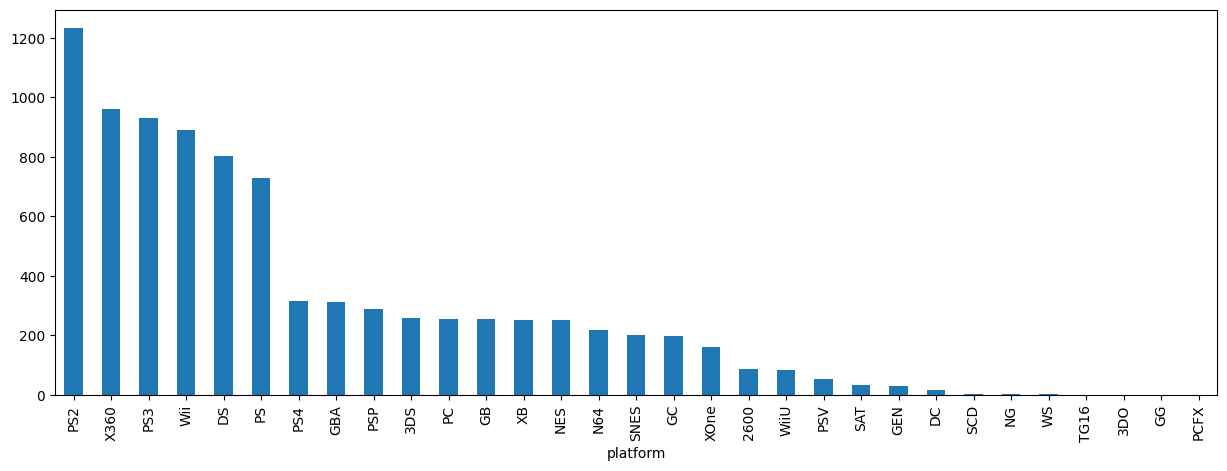

In [20]:
games_clean.groupby(['platform'])['ventas_totales'].sum().sort_values(ascending=False).plot(figsize=(15,5), kind='bar')

Las Plataformas con mas ventas son:
1. PS2
2. X360
3. PS3
4. Wii
5. DS

#### Distribucion por año de las (5) plataformas con mas ventas.

In [21]:
best = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
best_sell = games_clean[games_clean['platform'].isin(best)]

In [22]:
# Nos aseguramos que quedo correctamente filtrado.
best_sell['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [23]:
best_sell_plt = best_sell.groupby(['platform', 'year_of_release'])['ventas_totales'].sum().reset_index()

<AxesSubplot:xlabel='year_of_release', ylabel='ventas_totales'>

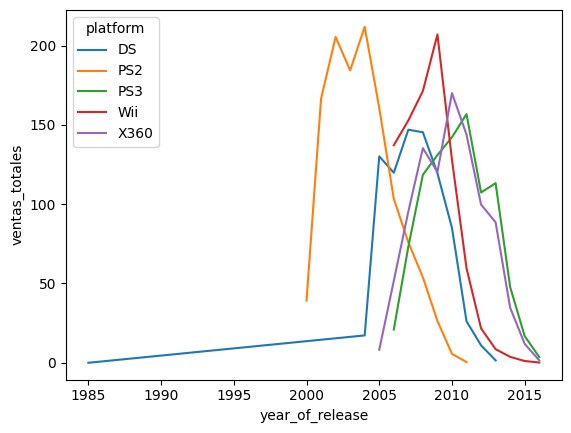

In [24]:
sns.lineplot(data=best_sell_plt, x='year_of_release', y= 'ventas_totales', hue='platform')

Se observa que el comportamiento para estas plataformas es similar, comienzan a crecer, tienen un umbral de venta y decaen, mas o menos su top de ventas se da en los 5 primeros años, y 5 años mas tienden a desaparecer.

#### Comportamiento (5) plataformas que solian ser mas populares pero ya no tienen mas ventas.

In [25]:
best_sell_plt.groupby('platform').agg(start_year= ('year_of_release', 'min'), end_year= ('year_of_release', 'max'))

,start_year,end_year
platform,,
DS,1985,2013
PS2,2000,2011
PS3,2006,2016
Wii,2006,2016
X360,2005,2016


Se observa que estas plataformas tienen un tiempo promedio de 10 años en nacer y desaparecer.

#### Informacion relevante para analisis.

Se determina que solo se va a trabajar con los datos del año 2007 en adelante, de acuerdo a como se evidencio en las agrupaciones y graficas anteriores, el tiempo de vida de las diferentes plataformas es en promedio de 10 años, por lo cual lo años anteriores no serian relevantes para este proyecto.

##### Vamos a crear nuestro nuevo DT, para solo trabajar los datos con la informacion mas relevante.

In [26]:
games_rel = games_clean[games_clean['year_of_release']>2006]

#### Plataformas lideres en ventas. (Potencialmente rentables)

In [27]:

sells_lead = games_rel.groupby(['platform'])['ventas_totales'].sum().sort_values(ascending=False).reset_index()
print(sells_lead)


   platform  ventas_totales
0       PS3          910.38
1      X360          901.37
2       Wii          754.03
3        DS          535.54
4       PS4          314.14
5       3DS          257.81
6       PSP          183.31
7       PS2          162.38
8        PC          160.57
9      XOne          159.32
10     WiiU           82.19
11      PSV           53.81
12      GBA            3.40
13       XB            0.73
14       GC            0.27
15       DC            0.06


Las 5 plataformas mas rentables son:

PS3, X360, Wii, DS y PS4.

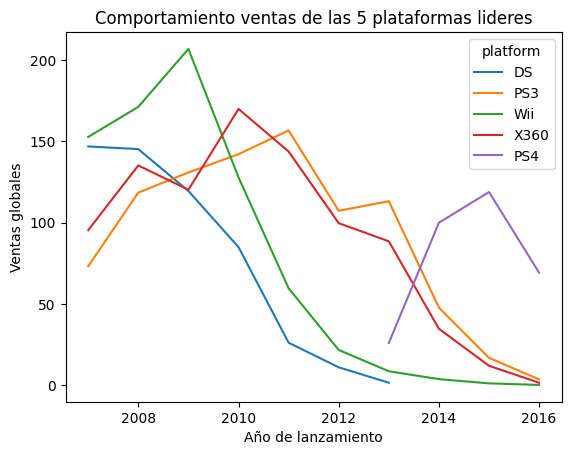

In [28]:
top5 = (games_rel.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).head(5).index)

ventas_top5 = (games_rel[games_rel['platform'].isin(top5)].groupby(['year_of_release', 'platform'])['ventas_totales'].sum().reset_index())

sns.lineplot(data=ventas_top5,x='year_of_release',y='ventas_totales',hue='platform')

plt.title('Comportamiento ventas de las 5 plataformas lideres')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales')
plt.show()

Al igual que el analisis anterior se observa que las plataformas tienen un climax de ventas y luego decrecen hasta desaparecer y ser reemplazadas por otras.

#### Diagrama de caja para ventas globales de todos los juegos.

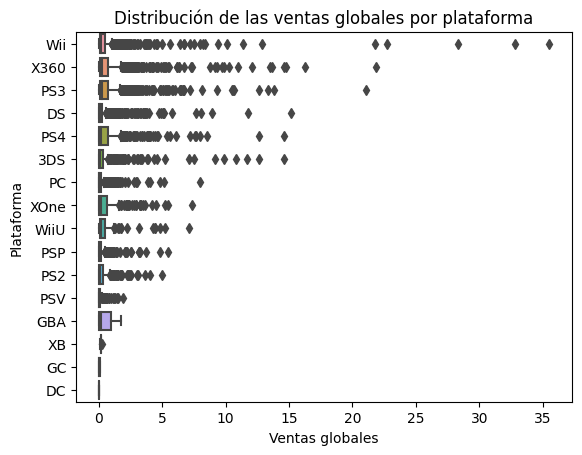

In [29]:
sns.boxplot(
    data=games_rel,
    x='ventas_totales',
    y='platform'
)

plt.title('Distribución de las ventas globales por plataforma')
plt.ylabel('Plataforma')
plt.xlabel('Ventas globales')
plt.show()

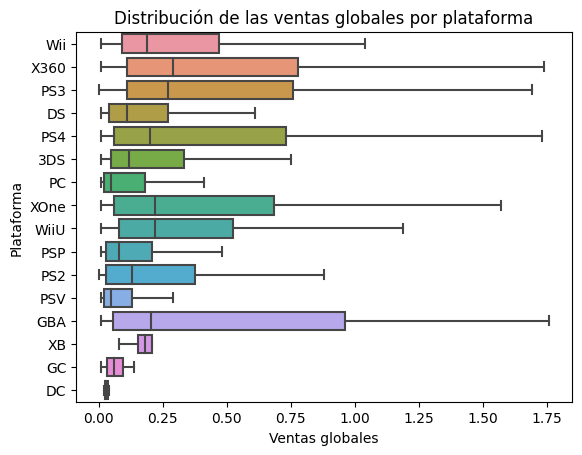

In [30]:
sns.boxplot(
    data=games_rel,
    x='ventas_totales',
    y='platform',
    showfliers = False
)

plt.title('Distribución de las ventas globales por plataforma')
plt.ylabel('Plataforma')
plt.xlabel('Ventas globales')
plt.show()

Se observa diferencias notables en las ventas entre plataformas. Algunas presentan mayores ventas promedio y mayor variabilidad, impulsadas por unos pocos juegos muy exitosos, mientras que en otras la mayoría de los titulos tiene ventas bajas.

#### Grafico de dispersion - Correlacion entre reseñas y ventas.

##### Vamos a crear una nueva tabla de datos solo para evaluar el comportamiento de la plataforma que mas ventas tuvo, en este caso PS3.

In [31]:
ps3 = games_rel[(games_rel['platform'] == 'PS3') & (games_rel['user_score'].notna()) & (games_rel['critic_score'].notna())]

##### Vamos a crear un Grafico de Dispersion para observar su comportamiento.

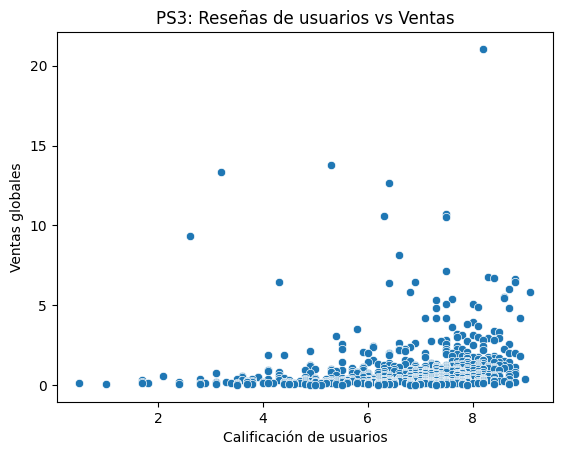

In [32]:
sns.scatterplot(data=ps3,x='user_score',y='ventas_totales')

plt.title('PS3: Reseñas de usuarios vs Ventas')
plt.xlabel('Calificación de usuarios')
plt.ylabel('Ventas globales')
plt.show()

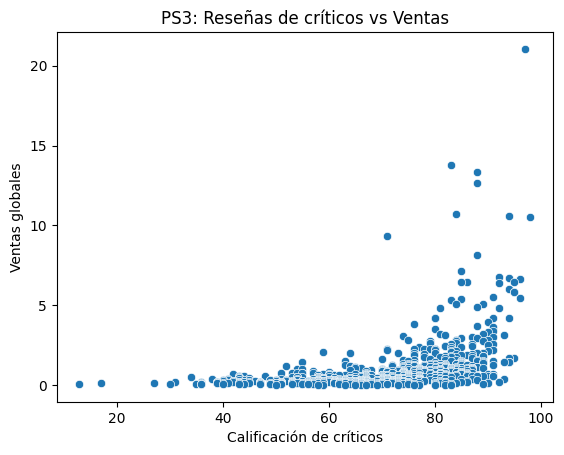

In [33]:
sns.scatterplot(data=ps3,x='critic_score',y='ventas_totales')

plt.title('PS3: Reseñas de críticos vs Ventas')
plt.xlabel('Calificación de críticos')
plt.ylabel('Ventas globales')
plt.show()

##### Vamos a calcular la Correlacion entre las reseñas y las ventas.

In [34]:
corr_user = ps3['user_score'].corr(ps3['ventas_totales'])
corr_critic = ps3['critic_score'].corr(ps3['ventas_totales'])

print('Correlación user_score vs ventas:', corr_user)
print('Correlación critic_score vs ventas:', corr_critic)

Correlación user_score vs ventas: 0.14154093147174007
Correlación critic_score vs ventas: 0.42844725913442244


En conclusion, para el caso de la plataformas PS3 se observa que las reseñas muestran un comportamiento muy disperso en cuanto a las ventas, para el caso de las calificaciones de usuarios estas no determinan el nivel de ventas, no existe un patron, un poco diferente para el caso de las calificaciones de criticos que muestra una mayor concentracion de juegos con altas ventas en rangos elevados de calificacion, lo que coincide con la correlacion moderada obtenida, puede tener un poco mas de influencia, pero no es determinante.

#### Comparativo de ventas de los mismos juegos en otras plataformas.

In [35]:
juegos_ps3 = games_rel[games_rel['platform'] == 'PS3']['name'].unique()
juegos_ps3

array(['Grand Theft Auto V', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern Warfare 3', ..., 'G1 Jockey 4 2008',
       'Dynasty Warriors: Eiketsuden', 'Samurai Warriors: Sanada Maru'],
      dtype=object)

In [36]:
comparacion = games_rel[games_rel['name'].isin(juegos_ps3)]
comparacion

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00


In [37]:
ventas_comp = (comparacion.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False))
ventas_comp

platform
PS3     910.38
X360    691.98
PS4     184.48
Wii     179.39
PS2      87.48
XOne     83.80
PC       78.58
DS       63.12
PSP      54.47
PSV      23.13
WiiU     18.25
3DS      18.23
XB        0.55
GC        0.23
GBA       0.19
Name: ventas_totales, dtype: float64

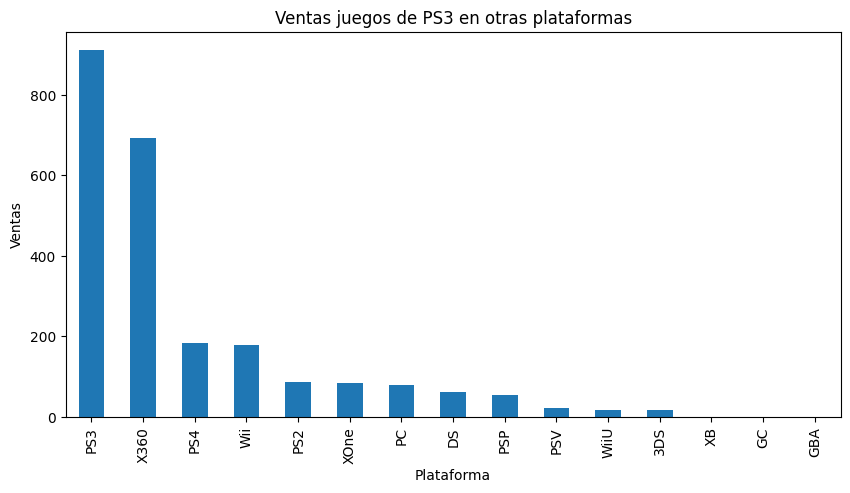

In [38]:
ventas_comp.plot(kind='bar', figsize=(10,5))
plt.title('Ventas juegos de PS3 en otras plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.show()

De los juegos que tiene PS3 sigue liderando en ventas, donde tal vez X360 hace competencia, pero las demas son muy bajas.

#### Distribucion de juegos por genero.

<AxesSubplot:xlabel='genre'>

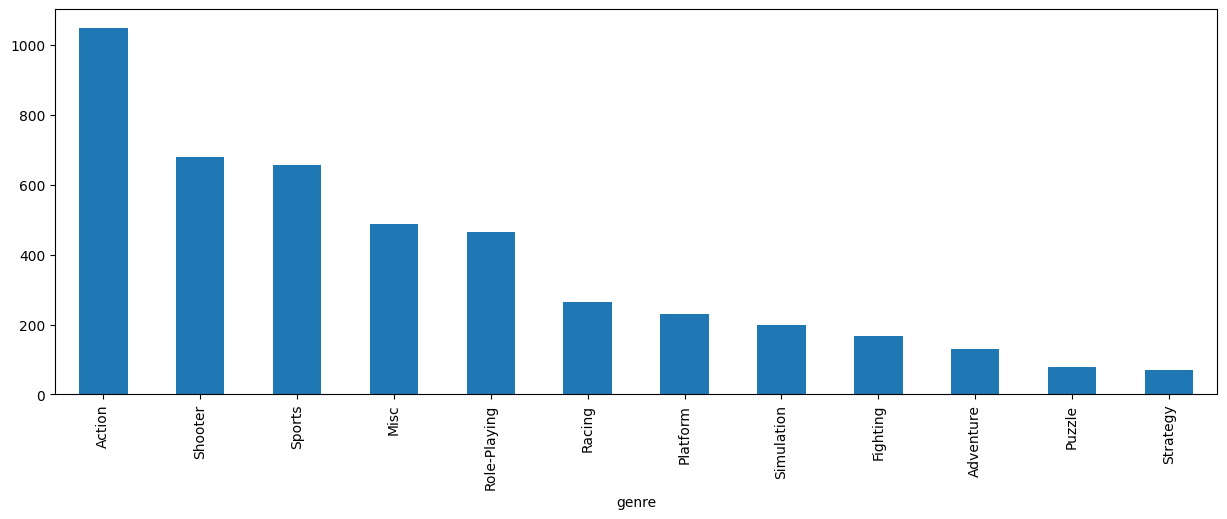

In [39]:
games_rel.groupby(['genre'])['ventas_totales'].sum().sort_values(ascending=False).plot(figsize=(15,5), kind='bar')

Se observa que existe mayor preferencia por los juegos de accion, seguido por los de disparos y deportes, mientas que los de rompecabezas y estrategia no tienen mucha acogida.

## Paso 4. Crear perfil de usuario para cada region.

##### Vamos a crear los 3 nuevos DF para cada una de las regiones.

In [40]:
na_games = games_rel[games_rel['na_sales'] > 0]
eu_games = games_rel[games_rel['eu_sales'] > 0]
jp_games = games_rel[games_rel['jp_sales'] > 0]

#### Las cinco plataformas principales.

In [41]:
na_platforms = na_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = eu_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = jp_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(f"Las principales plataformas en Norteamerica son: {list(na_platforms.index)}")
print(f"Las principales plataformas en Europa son: {list(eu_platforms.index)}")
print(f"Las principales plataformas en Japon son: {list(jp_platforms.index)}")

Las principales plataformas en Norteamerica son: ['X360', 'Wii', 'PS3', 'DS', 'PS4']
Las principales plataformas en Europa son: ['PS3', 'X360', 'Wii', 'PS4', 'DS']
Las principales plataformas en Japon son: ['DS', '3DS', 'PS3', 'PSP', 'Wii']


#### Los cinco generos principales.

In [42]:
na_genres = na_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = eu_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = jp_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print(f"Los principales generos en Norteamerica son: {list(na_genres.index)}")
print(f"Las principales generos en Europa son: {list(eu_genres.index)}")
print(f"Las principales generos en Japon son: {list(jp_genres.index)}")


Los principales generos en Norteamerica son: ['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing']
Las principales generos en Europa son: ['Action', 'Shooter', 'Sports', 'Misc', 'Racing']
Las principales generos en Japon son: ['Role-Playing', 'Action', 'Misc', 'Sports', 'Adventure']


Al parecer lo que es EEUU y Europa tienen gusto similar por los mismos generos de juego, a diferencia del 5to lugar, sin embargo en Japon tienen tendencia a otro tipo de generos en su lista como el Role-playing en 1er lugar y tambien se suma los de aventuras.

#### Clasificacion ESRB.

##### Vamos a calcular las ventas promedio por Rating y Region.

In [43]:
na_rating = na_games.groupby('rating')['na_sales'].mean()
eu_rating = eu_games.groupby('rating')['eu_sales'].mean()
jp_rating = jp_games.groupby('rating')['jp_sales'].mean()

rating_region = (pd.concat([na_rating, eu_rating, jp_rating], axis=1).rename(columns={'na_sales': 'eeuu','eu_sales': 'europa','jp_sales': 'japon'}))
print(rating_region)

             eeuu    europa     japon
rating                               
AO            NaN       NaN       NaN
E        0.333831  0.299832  0.301778
E10+     0.270056  0.194910  0.157192
EC       0.220000       NaN       NaN
K-A           NaN       NaN       NaN
M        0.599287  0.407886  0.091109
RP            NaN  0.030000       NaN
T        0.274442  0.179629  0.128862
unknown  0.256572  0.194860  0.108210


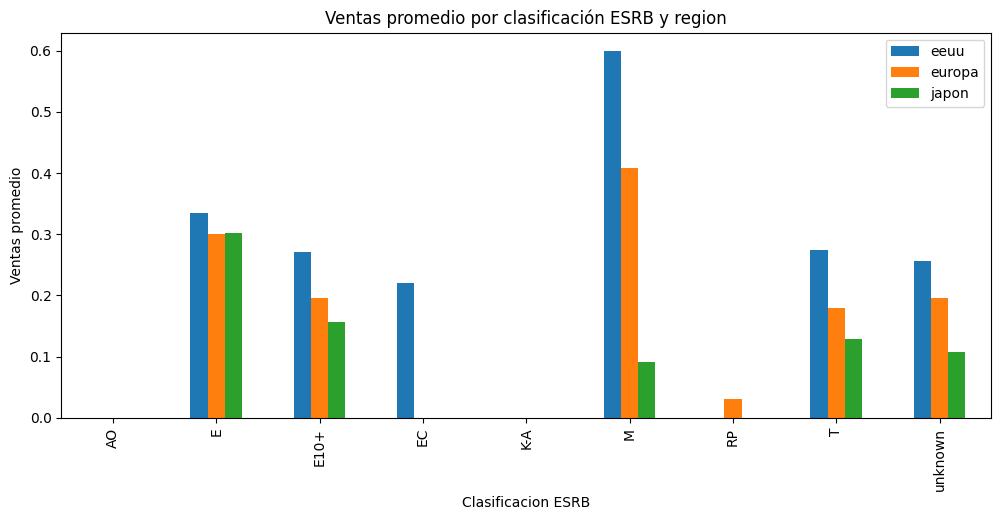

In [142]:
rating_region.plot(kind='bar', figsize=(12,5))
plt.title('Ventas promedio por clasificación ESRB y region')
plt.xlabel('Clasificacion ESRB')
plt.ylabel('Ventas promedio')
plt.show()

En conclusion y de acuerdo al anterior grafico, podemos decir que Estados unidos y Europa tienen tendencias similares para juegos con clasificacion M para maduros y E para todos, aunque EEUU lidera en ventas, y que de acuerdo a lo anterior estas clasificaciones si influyen en las ventas, mientras que Japon tiene otras preferencias sus mejores y mayores ventas estan enfocadas en la clasificacion E, y contrario a las otras 2 regiones sus menores ventas estan en M. En resumen Las ventas promedio varian segun la clasificación ESRB y la region, evidenciando preferencias culturales distintas.

## Paso 5. Pruebas de Hipotesis.

#### En esta ocasión vamos a probar la hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Elaboramos las hipótesis nula y alternativa, y determinamos el valor alfa.


Hipótesis:

- H0: La calificacion promedio de los usuarios para las plataformas Xbox One y PC es la misma.
- H1: La calificacion promedio de los usuarios para las plataformas Xbox One y PC es diferente.

Nivel de significancia (α): 0.05


In [44]:
# Definimos las 2 variables

xone = games_rel[games_rel['platform'] == 'XOne']['user_score'].dropna()
pc = games_rel[games_rel['platform'] == 'PC']['user_score'].dropna()

Escogemos y desarrollamos la prueba estadistica.

In [45]:
result = st.ttest_ind(xone,pc,equal_var=False)
print('Valor p:', result.pvalue)

Valor p: 0.04401892858926167


In [46]:
alpha = 0.05
if (result.pvalue < alpha):
    print('Rechaza hipotesis nula: Las calificaciones promedio de las 2 plataformas son diferentes.')
else:
    print('No podemos rechazar la hipotesis nula: No hay diferencia significativa.')

Rechaza hipotesis nula: Las calificaciones promedio de las 2 plataformas son diferentes.


#### En esta ocasión vamos a probar la hipótesis de que las calificaciones promedio de los usuarios para los generos de accion y deportes son diferentes.

Elaboramos las hipótesis nula y alternativa, y determinamos el valor alfa.

Hipótesis:

- H0: La calificacion promedio de los usuarios para los generos de accion y deportes es la misma.
- H1: La calificacion promedio de los usuarios para los generos de accion y deportes es diferente.

Nivel de significancia (α): 0.05

In [47]:
# Definimos las 2 variables

accion = games_rel[games_rel['genre'] == 'Action']['user_score'].dropna()
deportes = games_rel[games_rel['genre'] == 'Sports']['user_score'].dropna()

Escogemos y desarrollamos la prueba estadistica.

In [48]:
result = st.ttest_ind(accion,deportes,equal_var=False)
print('Valor p:', result.pvalue)

Valor p: 4.540665510055229e-11


In [49]:
alpha = 0.05
if (result.pvalue < alpha):
    print('Rechaza hipotesis nula: Las calificaciones promedio de las 2 plataformas son diferentes.')
else:
    print('No podemos rechazar la hipotesis nula: No hay diferencia significativa.')

Rechaza hipotesis nula: Las calificaciones promedio de las 2 plataformas son diferentes.


En conclusion, las pruebas realizadas muestran que el promedio de las calificaciones de los usuarios difiere entre plataformas y generos, lo que indica comportamientos distintos en la valoracion de los videojuegos. Estas diferencias no implican necesariamente una relacion directa entre las variables, sus medias presentan diferencias significativas.

## Paso 6. Conclusiones generales.

De acuerdo a todo el analisis anterior, amoldando la informacion desde diferentes perspectivas, y agrpandola de diferentes formas, podemos conclui lo siguiente:

1. A traves de los años se han ido incrementando la ventas en las diferentes plataformas, y hay un mayor seguimiento y mejor consignacion de la informacion de datos relevantes para su analisis.
2. Las plataformas que han punteado en los ultimos años en ventas han sido PS3/4, X360 y Wii.
3. El comportamiento usual de las ventas de las diferentes plataformas es que tienen un punto cumbre, y despues de algunos años decrece y luego desaparece, siendo reemplazadas.
4. Las reseñas de usuarios no afectan el nivel de ventas, mientras que la de los críticos si tieneden a estar ligeramente relacionadas.
5. Las diferencias culturales son muy claras entre eeuu-europa y lo que es japon, tienen diferentes gustos y tendencias por los diferentes generos y clasificaciones, lo cual es muy importante tener en cuenta a la hora de planificar campañas publicitarias.
6. El score entre plataformas varian, no tienen similitud.